In [126]:
!pip install sklearn

  Stored in directory: C:\Users\ASUS\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Data Preparation

In [4]:
X = np.random.randn(100)

In [5]:
noise = np.random.randn(100)

In [6]:
Y = 2*X + 5 + 0.3*noise

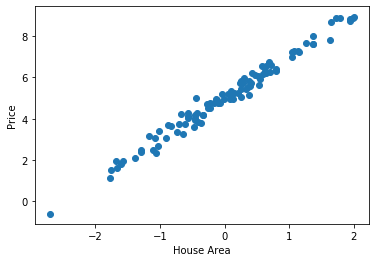

In [7]:
plt.scatter(X,Y)
plt.xlabel("House Area")
plt.ylabel("Price")
plt.show()

In [8]:
def hypothesis(x,theta):
    return (theta[0] + theta[1]*x)

In [9]:
def error(X,Y,theta):
    m = X.shape[0]
    err = 0
    for i in range(m):
        yx = hypothesis(X[i],theta)
        err += (yx - Y[i])**2
    return err

In [10]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        yx = hypothesis(X[i],theta)
        grad[0] += (yx - Y[i])
        grad[1] += (yx - Y[i])*X[i]
    return grad

In [11]:
def prediction(X_test,theta):
    return theta[0] + theta[1]*X_test

In [12]:
X_test = np.arange(-3,5)
def plot_line(theta):
    Y_pred = prediction(X_test,theta)
    plt.scatter(X,Y)
    plt.plot(X_test,Y_pred)

In [13]:
def gradient_descent(X,Y,learning_rate=0.001,init_steps = 1,max_steps = 80):
    theta = np.zeros((2,))
    error_list = []
    plt.scatter(X,Y)
    while(init_steps<max_steps):
        grads = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grads[0]
        theta[1] = theta[1] - learning_rate*grads[1]
        total_error = error(X,Y,theta)
        if init_steps%5 == 0:
            plot_line(theta)
        error_list.append(total_error)
        init_steps += 1
    return theta,error_list

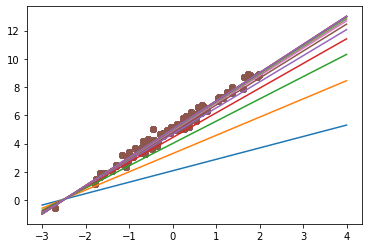

In [14]:
theta,error_list = gradient_descent(X,Y)

In [15]:
print(theta)

[5.01937366 2.00055243]


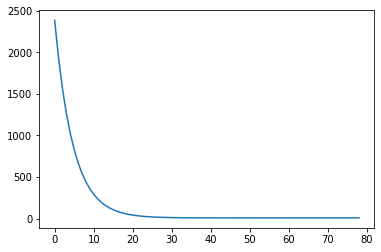

In [25]:
plt.plot(error_list)
plt.show()

## normalisation and preprocessing

In [65]:
def getDataset(shape):
    X = np.random.randn(shape[0])*2 + 5
    e = np.random.randn(shape[0])
    Y = 2*X + 5 + 0.7*e
    return X,Y

In [66]:
X,Y = getDataset((100,))

In [67]:
print(X)

[ 4.82052174  4.59634488  7.68059028  6.81073955  1.65059938  3.60240927
  5.52719755  6.15843775  8.18280025  2.38291231  7.90641691  5.64392602
  5.67403545  5.38447402  4.18515451  5.54121164  6.49175684  3.088147
  5.10046849  4.68318454  3.27084409  5.36744728  3.10556019  2.56523817
  2.94816724  9.95376226  6.06104838  3.06658899  3.89128154  5.24661269
  4.67021418  2.89290465  6.59741644  2.77102571  4.64808162  2.05105649
  6.24292005  8.27987592  6.11984974  6.35803348  5.43370455  4.89534442
  8.5808335   3.70197213  8.01004277  3.04275278  2.45981898  3.59048055
  4.11780089 10.79175708  3.53809708  3.05062564  6.58410994  9.10141866
  7.04824429  7.55127466  1.09057425  4.42375633  7.09689888  5.44989391
  7.58470374  5.47930939  2.48021396  2.78268415  4.97027509  4.95275424
  9.43989181  5.44099579  3.71174062  6.01565642  6.29084335  7.07610267
  5.04027829  4.13175955  6.67261131  4.10393577  7.05821671  2.61938865
  5.30655264  4.91129432  3.4802667   4.77608326  3.8

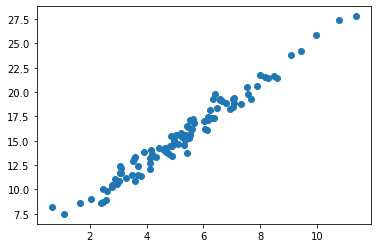

In [68]:
plt.scatter(X,Y)

In [69]:
mu = np.mean(X)
sigma = np.std(X)
print(mu)

5.268081056429418


In [70]:
normalised_data = (X-mu)/sigma

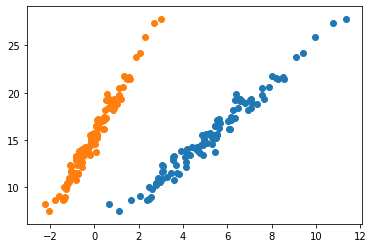

In [72]:
plt.scatter(X,Y)
plt.scatter(normalised_data,Y)

## regression direct method
- theta = (X^ X)^-1.(X^ Y)

In [3]:
dfx = pd.read_csv("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/regression_1/Linear_X_Train.csv")
dfy = pd.read_csv("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/regression_1/Linear_Y_Train.csv")

In [4]:
X = dfx.values
Y = dfy.values
print(X.shape)

(3750, 1)


In [5]:
X = X.reshape((-1,1))
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X)

(3750, 1)
[[ 1.         -0.28930742]
 [ 1.         -0.58880963]
 [ 1.          1.02750749]
 ...
 [ 1.         -0.30516366]
 [ 1.          1.67583291]
 [ 1.         -0.49175724]]


In [120]:
theta = np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,Y))

In [121]:
X_test = pd.read_csv("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/regression_1/Linear_X_Test.csv")
X_test = X_test.values

In [122]:
def prediction(X_test,theta):
    return theta[0] + theta[1]*X_test

In [123]:
Y_pred = prediction(X_test,theta)

In [124]:
print(theta)

[[ 3.72798828]
 [80.54363185]]


In [125]:
print(Y_pred)

[[-147.52847525]
 [ -66.26699842]
 [-200.06209345]
 ...
 [  14.0382031 ]
 [ -18.66616899]
 [ -51.07594693]]
